In [13]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [14]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: no_excitation (control parameters: [])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: False


In [15]:
"""Base settings"""

directory = 'D:\\parameter_studies\\gradient_descent_test_1'#'D:\\parameter_studies\\Bubble_dynamics_simulation\\test 1'
file_base_name = 'output_'

In [16]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))
        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (   0 rows)
	output_10.csv            ( 105 rows)
	output_11.csv            ( 137 rows)
	output_12.csv            (  96 rows)
	output_13.csv            (  93 rows)
	output_14.csv            ( 122 rows)
	output_15.csv            ( 122 rows)
	output_16.csv            ( 138 rows)
	output_17.csv            ( 127 rows)
	output_18.csv            ( 133 rows)
	output_19.csv            ( 119 rows)
	output_2.csv             (  62 rows)
	output_20.csv            (  55 rows)


C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool

	output_21.csv            ( 112 rows)
	output_22.csv            (  94 rows)
	output_23.csv            (  89 rows)
	output_24.csv            ( 114 rows)
	output_25.csv            ( 102 rows)
	output_26.csv            (  93 rows)
	output_27.csv            (   0 rows)
	output_28.csv            ( 102 rows)
	output_29.csv            ( 109 rows)
	output_3.csv             ( 152 rows)
	output_30.csv            (  93 rows)
	output_31.csv            ( 109 rows)
	output_32.csv            (  98 rows)
	output_33.csv            (  93 rows)


C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool

	output_34.csv            ( 111 rows)
	output_35.csv            ( 116 rows)
	output_36.csv            ( 101 rows)
	output_37.csv            ( 105 rows)
	output_38.csv            ( 104 rows)
	output_39.csv            ( 105 rows)
	output_4.csv             (  70 rows)
	output_40.csv            ( 103 rows)
	output_41.csv            ( 116 rows)
	output_42.csv            (  89 rows)
	output_43.csv            ( 103 rows)
	output_44.csv            ( 132 rows)


C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool

	output_45.csv            (  99 rows)
	output_46.csv            ( 129 rows)
	output_47.csv            ( 116 rows)
	output_48.csv            ( 122 rows)
	output_49.csv            (  86 rows)
	output_5.csv             (  91 rows)
	output_50.csv            ( 113 rows)
	output_6.csv             ( 107 rows)
	output_7.csv             ( 105 rows)
	output_8.csv             ( 129 rows)
	output_9.csv             ( 111 rows)
_______________________________________
total number of files: 50
total:      5132    rows   ( 100.00 %)
xx0:        3566    rows   (  69.49 %)	succecfully solved with LSODA solver
xx1:        1554    rows   (  30.28 %)	LSODA solver didn't converge
xx2:        12      rows   (   0.23 %)	LSODA solver timed out
xx3:        0       rows   (   0.00 %)	LSODA solver had a fatal error
x0x:        1393    rows   (  27.14 %)	succecfully solved with Radau solver
x4x:        173     rows   (   3.37 %)	Radau solver didn't converge (NO SOLUTION!)
x5x:        0       rows   (   0.00 %)	Rad

C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_6304\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool

In [17]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 4959 rows ( 96.63 %)


In [18]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,gases,fractions,surfactant,elapsed_time,steps,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency
22,0,0.000010,6.822888,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,16.497502,14434,1.991926e-06,4829.517788,4.750033e-15,1.322783e-06,0.0,1.635166e+04
20,0,0.000010,6.822798,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,3.664824,17349,1.991899e-06,4829.474697,4.749790e-15,1.322730e-06,0.0,1.635183e+04
19,0,0.000010,6.822798,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,3.445931,17349,1.991899e-06,4829.474697,4.749790e-15,1.322730e-06,0.0,1.635183e+04
13,0,0.000010,6.830729,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,16.272389,14332,1.982915e-06,4830.610069,4.683180e-15,1.305073e-06,0.0,1.636304e+04
12,0,0.000010,6.830729,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,5.257135,16627,1.982897e-06,4830.605555,4.683046e-15,1.305038e-06,0.0,1.636306e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0,0.000006,1.000900,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,0.263771,1626,3.019995e-07,303.440257,8.527125e-110,3.358225e-15,0.0,2.312475e+90
16,0,0.000006,1.000900,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,0.272646,1626,3.019995e-07,303.440257,8.527125e-110,3.358225e-15,0.0,2.312475e+90
13,0,0.000006,1.000900,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,0.309358,1748,3.017171e-07,303.440152,7.803713e-110,3.348084e-15,0.0,2.519213e+90
12,0,0.000006,1.000900,1013250.0,0.05,303.15,4245.125716,0.000815,11 1,0.25 0.75,1.0,0.299696,1659,3.016773e-07,303.440149,7.607450e-110,3.347934e-15,0.0,2.584089e+90


In [19]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args].describe()

,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,surfactant,elapsed_time,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency
count,4959.000000,4959.000000,4959.0,4.959000e+03,4.959000e+03,4959.000000,4.959000e+03,4959.0,4959.000000,4.959000e+03,4959.000000,4.959000e+03,4.959000e+03,4959.0,4.959000e+03
mean,0.000006,7.571296,1013250.0,5.000000e-02,3.031500e+02,4245.125716,8.148612e-04,1.0,9.962042,1.355062e-06,4835.671420,1.622843e-15,4.924014e-07,0.0,2.961648e+87
std,0.000002,1.263642,0.0,6.939594e-18,5.684915e-14,0.000000,2.168623e-19,0.0,9.964630,3.351245e-07,752.088781,1.068479e-15,3.015474e-07,0.0,9.866277e+88
min,0.000002,1.000900,1013250.0,5.000000e-02,3.031500e+02,4245.125716,8.148612e-04,1.0,0.263771,1.530818e-07,303.440149,-3.531089e-16,3.347934e-15,0.0,1.635166e+04
25%,0.000005,7.251978,1013250.0,5.000000e-02,3.031500e+02,4245.125716,8.148612e-04,1.0,2.883455,1.199407e-06,4912.781164,9.156031e-16,2.933502e-07,0.0,1.710897e+04
50%,0.000006,7.861847,1013250.0,5.000000e-02,3.031500e+02,4245.125716,8.148612e-04,1.0,5.148760,1.363040e-06,5034.789000,1.393215e-15,4.289858e-07,0.0,1.766981e+04
75%,0.000007,8.237671,1013250.0,5.000000e-02,3.031500e+02,4245.125716,8.148612e-04,1.0,14.159172,1.573467e-06,5101.869763,2.248723e-15,6.575636e-07,0.0,1.843302e+04
max,0.000010,9.999190,1013250.0,5.000000e-02,3.031500e+02,4245.125716,8.148612e-04,1.0,57.001508,2.356938e-06,5664.997045,5.055994e-15,2.220628e-06,0.0,4.958562e+90


succecfully solved with LSODA solver
Low pressure warning: The pressure during the expansion is lower, than the saturated water pressure


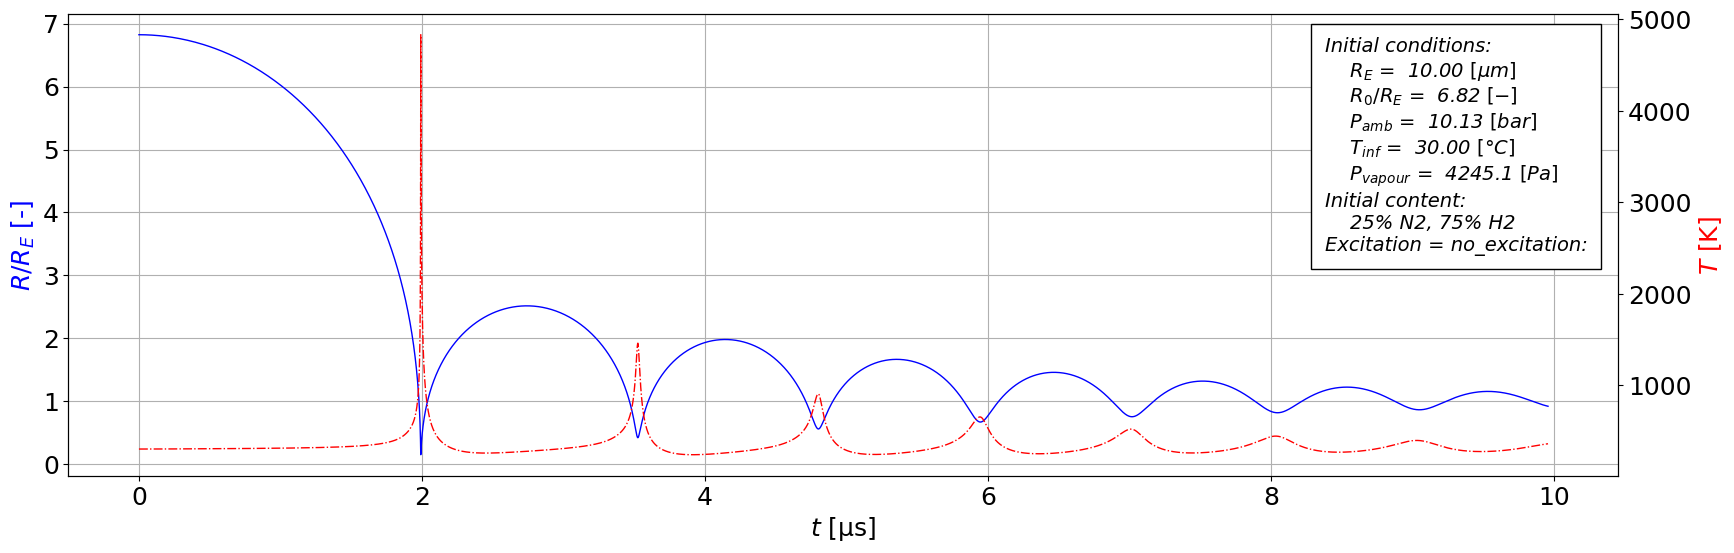

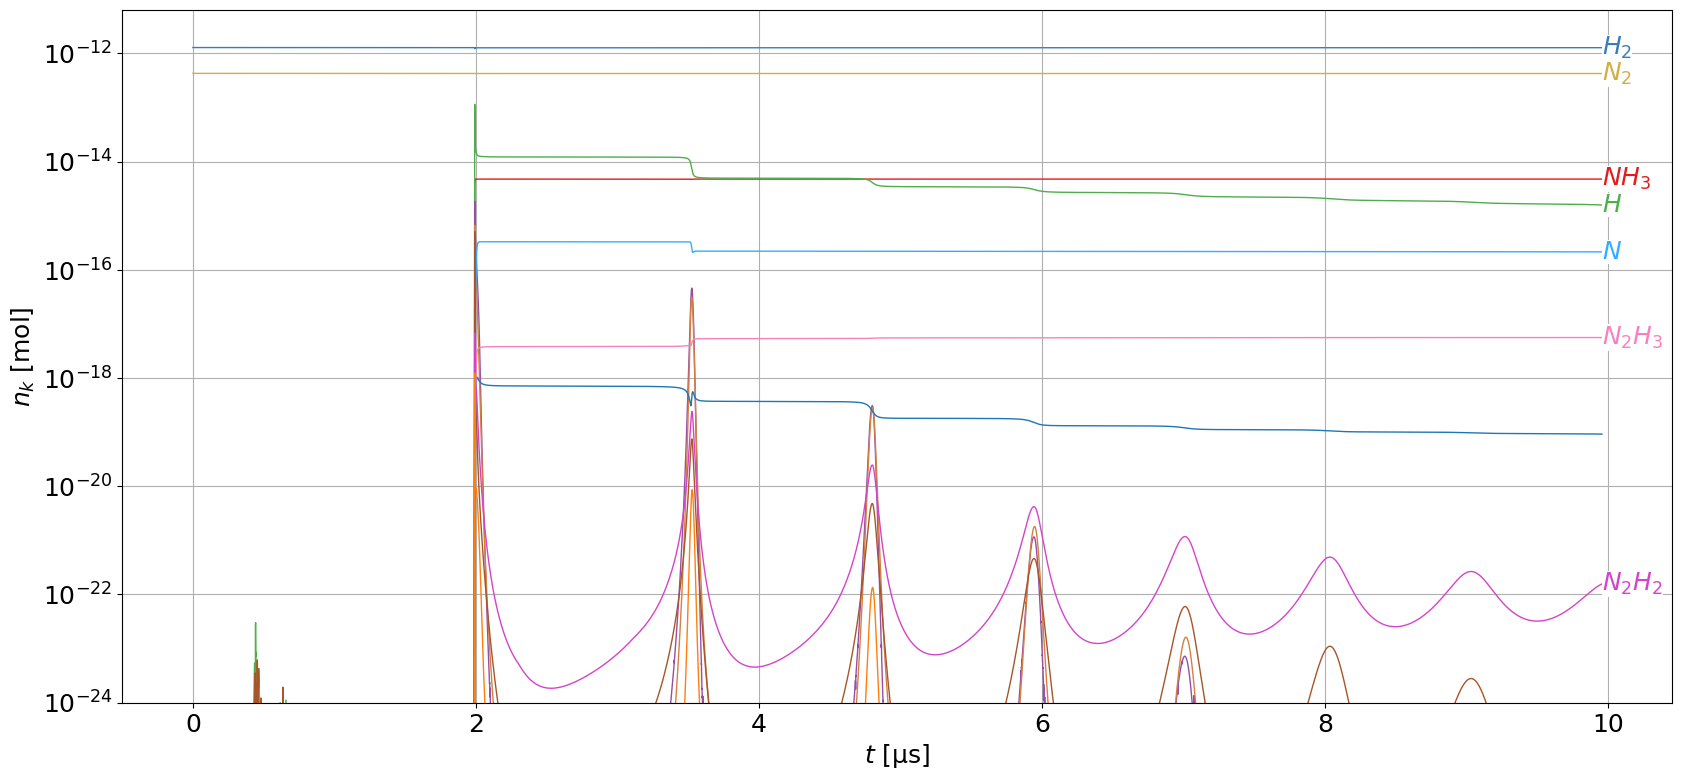

Control parameters:
    ID = 0
    R_E = 10.00 [um]
    ratio = 6.82 [-]
    P_amb = 10.13 [bar]
    alfa_M = 0.05 [-]
    T_inf = 30.00 [°C]
    P_v = 4245.13 [Pa]
    mu_L = 0.81 [mPa*s]
    surfactant = 1.00 [-]    
    excitation = 'no_excitation'
   )
    Initial content: 25% N2, 75% H2
Simulation info:
    error_code = 200 (success = True)
    elapsed_time = 2.68 [s]
    steps = 17082 [-]
Final state:
    R_final = 9.99 [um];   R_dot_final =-7.116419003620842e-14 [m/s];   T_final = 303.15 [K]
    n_NH3_final = 4.75e-15 [mol]
    Final molar concentrations: [mol/cm^3]
        NH3   :   1.1374776834793577e-06;    H2    :    0.0003049330607907195;    H     :   1.5144136222342517e-17;    NH2   :   2.7899523663182263e-15;    
        NH    :     4.41173052307541e-23;    N     :    8.359688325681309e-12;    NNH   :   -7.875634964793936e-23;    N2H4  :   6.7178099118873184e-12;    
        N2H3  :   1.3503409758015978e-09;    N2H2  :    2.730840057106528e-11;    H2NN  :  -2.104248048945

In [20]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[0])   # choose the most energy efficient one
de.plot(cpar)